# Download and Organize Example Classifications

### These are preliminary classifications that demonstrate how to organize your own classifications or use the ones posted on svrimg.org

#### By default, the function "get_pred_tables" will download the example classifications.  You just have to provide a directory in which to save it.

In [1]:
import sys
sys.path.insert(0, '..')
from utils.get_tables import get_pred_tables

egs = get_pred_tables(data_dir="../data/csvs/", remove_first_row=True)

egs.head()

,Class Code,Class Name
UNID,,
199604200208z000000206,0,Cellular
199604192244z000000197,0,Cellular
199605280130z000000300,0,Cellular
199605280140z000000298,0,Cellular
199604192307z000000207,0,Cellular


### You can also organize your local predictions in yearly csv files. Look at the documentation to see how it works.

In [2]:
help(get_pred_tables)

Help on function get_pred_tables in module utils.get_tables:

get_pred_tables(data_dir, url='http://svrimg.org/data/', example=True, default_name='*_Table_*.csv', csv_name='eg_classes_96-17', remove_first_row=False)
    Either downloads example predictions if 'example' is true, or combines your prediction
    tables in 'data_dir' into one table using the default naming format of 
    '*_Table_*.csv' or whatever is passed into default_name. This will
    attempt to grab every year from 1996 - 2017, but will not fail if a year is missing. 
    By default, the first row in every year's table is example data on svrimg.org, and 
    it can be removed as long as 'remove_first_row' is True. By default, if there is a 
    repeated UNID, the last one is kept.  The theory here is that if you accidentally 
    clicked something, you would go back and fix it.  Thus, the nth time is likely 
    more accurate.
    
    :param data_dir: str. Base directory in which to save the csv file.
    :param ur

### The following example saves a combined csv in "../data/csvs/" named "eg_classes_96-17.csv" and will search that directory for your csvs with the filename format "\*_table_\*", which basically says it will accept any value before or after "_table_", or, in other words, any csv file with that format.  This will work for all files that were downloaded and unmodified from svrimg.org.  Additionally, the first row is removed if remove_first_row is set to True.  This should always be the case for svrimg.org tables, because the first row is "example data".

E.g., 1997_table_1598590650584.csv

In [3]:
egs = get_pred_tables(data_dir="../data/csvs/", example=False, remove_first_row=True)

egs.head()

Reading ../data/csvs\1996_table_1598301036645.csv
Reading ../data/csvs\1997_table_1598654995730.csv
Reading ../data/csvs\1998_table_1598654717113.csv
Reading ../data/csvs\1999_table_1598653800907.csv
Reading ../data/csvs\2000_table_1598653195256.csv
Reading ../data/csvs\2001_table_1598652843720.csv
Reading ../data/csvs\2002_table_1598652512975.csv
Reading ../data/csvs\2003_table_1598652048663.csv
Reading ../data/csvs\2004_table_1598649705836.csv
Reading ../data/csvs\2005_table_1598648953176.csv
Reading ../data/csvs\2006_table_1598648546573.csv
Reading ../data/csvs\2007_table_1598647933711.csv
Reading ../data/csvs\2008_table_1598591450461.csv
Reading ../data/csvs\2009_table_1598590650584.csv
Reading ../data/csvs\2010_table_1598590117221.csv
Reading ../data/csvs\2011_table_1598317702789.csv
Reading ../data/csvs\2012_table_1598316949455.csv
Reading ../data/csvs\2013_table_1598316588366.csv
Reading ../data/csvs\2014_table_1598315495412.csv
Reading ../data/csvs\2015_table_1598315118509.csv


,Class Code,Class Name
UNID,,
199604200208z000000206,0,Cellular
199604192244z000000197,0,Cellular
199605280130z000000300,0,Cellular
199605280140z000000298,0,Cellular
199604192307z000000207,0,Cellular


### You can then use other helper functions to plot representative means for each classification subset.

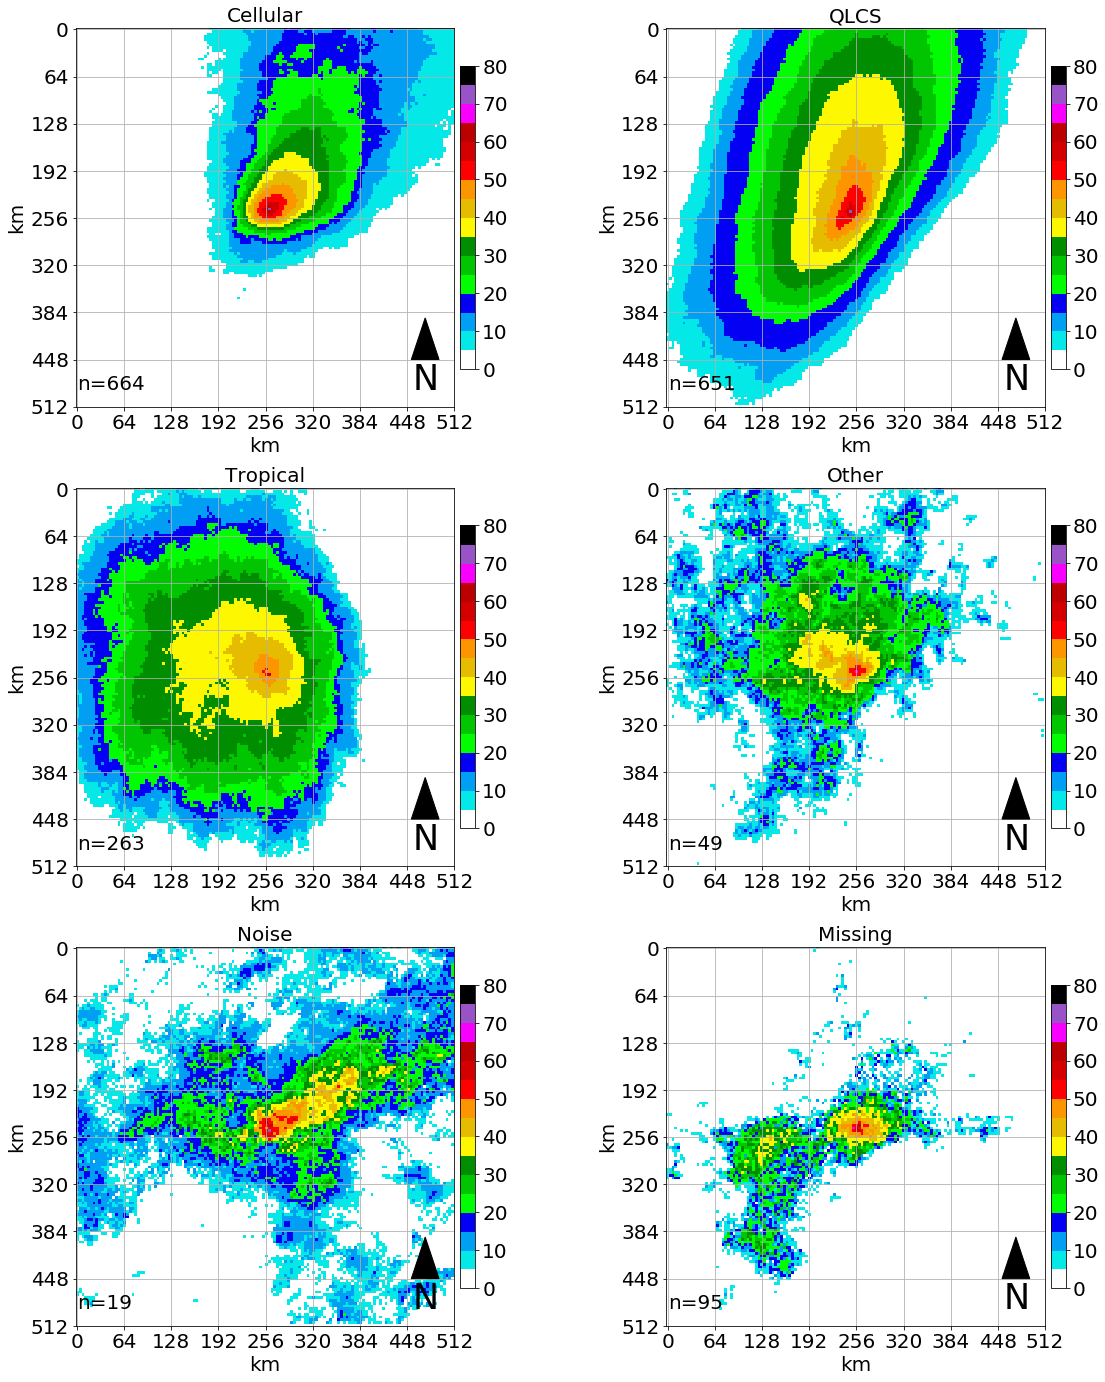

In [4]:
import sys
sys.path.insert(0, '..')
from utils.get_images import get_img_list
from utils.map_helper import draw_box_plot
from utils.pmmean import _run_pmm_one_variable

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 25, 25
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20

i = [8, 7, 5, 4, 2, 1]
for cls in ['Cellular', 'QLCS', 'Tropical', 'Other', 'Noise', 'Missing']:
    
    sub = egs[egs["Class Name"]==cls].copy()
    
    imgs = get_img_list(sub.index.values, "../data/tor/")
    
    img = _run_pmm_one_variable(imgs)
    
    ax = plt.subplot(4, 3, i.pop())
    
    ax = draw_box_plot(ax, img, cbar_shrink=0.8)

    ax.set_title(cls, fontsize=20)
    
    ax.text(0, 130, "n={}".format(len(imgs)), fontsize=20)
    
plt.tight_layout()

# Save the image data in a keras friendly format

### The data are organized as follows:

Training: 1996 - 2011

Validation: 2012 - 2013

Testing: 2014 - 2017

### We can visualize the class breakdowns per subset.  First, get the svrgis index data and join it with the class data above.

In [5]:
from utils.get_tables import get_svrgis_table

svrgis = get_svrgis_table(data_dir="../data/csvs/")

egs_join = egs.join(svrgis)

egs_join.head()

,Class Code,Class Name,om,tz,st,stf,stn,mag,inj,fat,...,f3,f4,fc,init_date,fmt_date,date_utc,yr,mo,dy,hr
199601180433z000000018,1,QLCS,18,3,TX,48,2,1,1,0,...,0,0,0,1996-01-17-22:33:00,1996-01-17 22:33:00,1996-01-18 04:33:00,1996,1,18,4
199601180450z000000024,1,QLCS,24,3,TX,48,8,1,0,0,...,0,0,0,1996-01-17-22:50:00,1996-01-17 22:50:00,1996-01-18 04:50:00,1996,1,18,4
199601180500z000000025,1,QLCS,25,3,TX,48,9,1,0,0,...,0,0,0,1996-01-17-23:00:00,1996-01-17 23:00:00,1996-01-18 05:00:00,1996,1,18,5
199601181405z000000009,1,QLCS,9,3,MO,29,1,1,0,0,...,0,0,0,1996-01-18-08:05:00,1996-01-18 08:05:00,1996-01-18 14:05:00,1996,1,18,14
199601181455z000000012,1,QLCS,12,3,TN,47,1,0,0,0,...,0,0,0,1996-01-18-08:55:00,1996-01-18 08:55:00,1996-01-18 14:55:00,1996,1,18,14


### Now you can query the classifications by year.

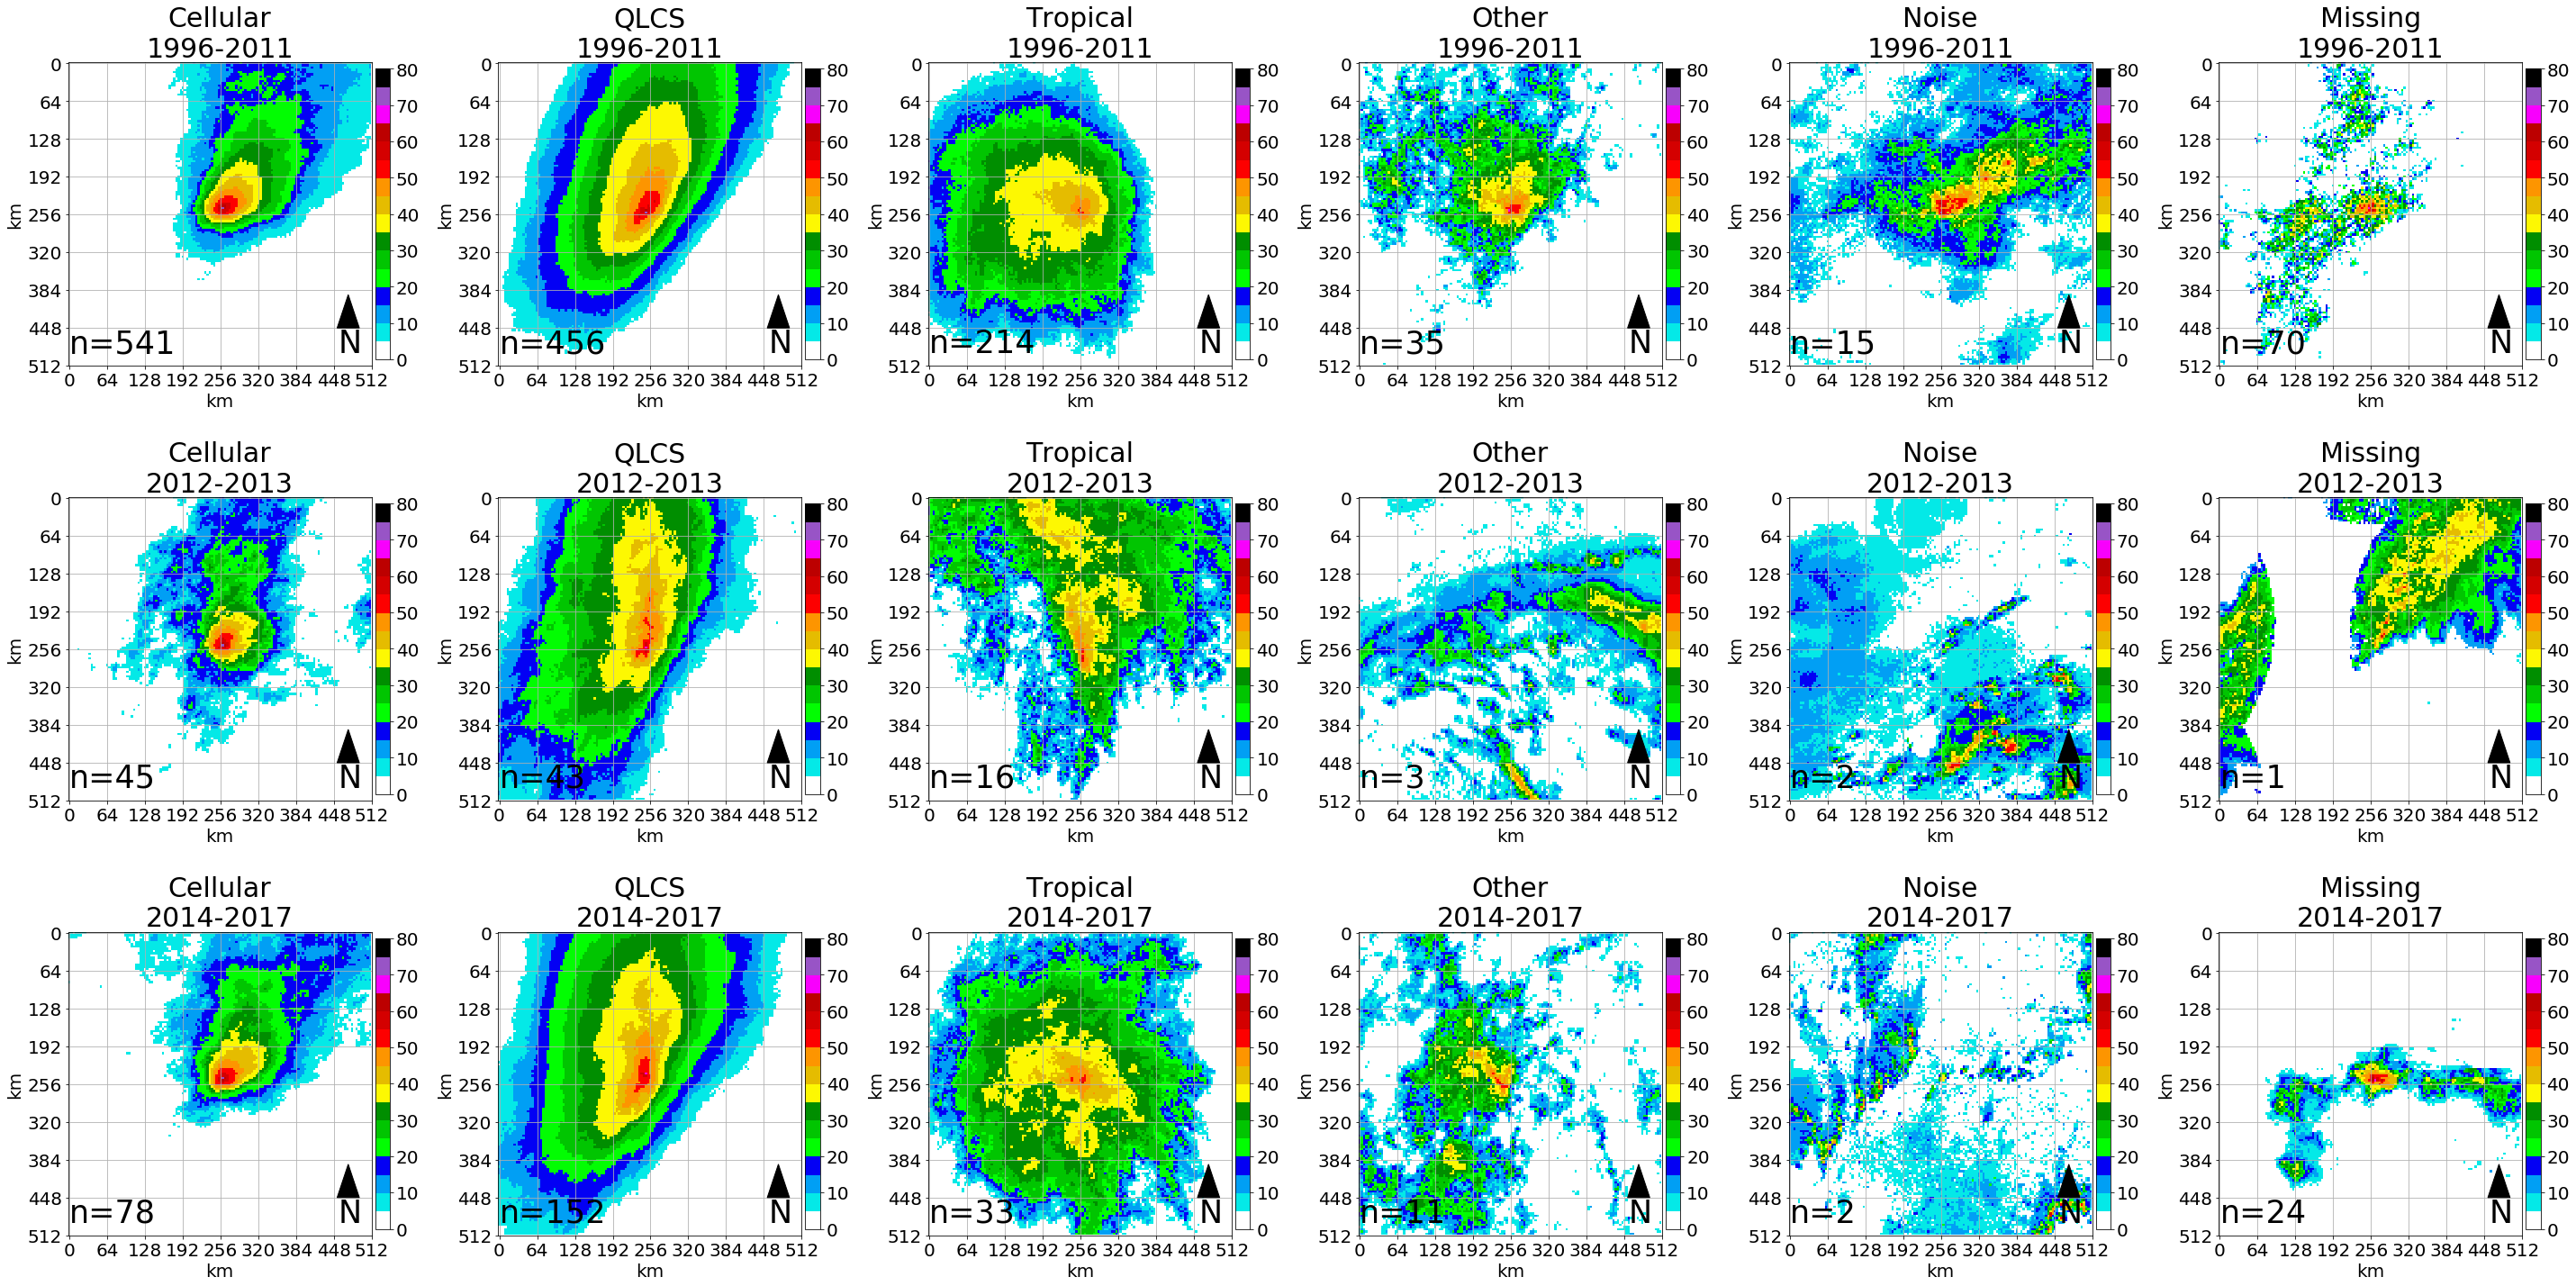

In [6]:
plt.rcParams['figure.figsize'] = 40, 40
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20

i = 1

for subset in [(1996, 2011), (2012, 2013), (2014, 2017)]:
    
    sub_ = egs_join[(egs_join.yr >= subset[0]) & (egs_join.yr <= subset[1])].copy()
    
    for cls in ['Cellular', 'QLCS', 'Tropical', 'Other', 'Noise', 'Missing']:
    
        class_ = sub_[sub_["Class Name"]==cls].copy()

        imgs = get_img_list(class_.index.values, "../data/tor/")

        img = _run_pmm_one_variable(imgs)

        ax = plt.subplot(6, 6, i)

        ax = draw_box_plot(ax, img, cbar_shrink=0.8)

        ax.set_title(cls + "\n{}-{}".format(subset[0], subset[1]), fontsize=30)

        ax.text(0, 130, "n={}".format(len(imgs)), fontsize=35)
        
        i += 1
    
plt.tight_layout()

### Save the image data and classification data in pickles

In [7]:
import numpy as np
import pickle

for subset, name in zip([(1996, 2011), (2012, 2013), (2014, 2017)], ("train", "validation", "test")):
    
    sub_ = egs_join[(egs_join.yr >= subset[0]) & (egs_join.yr <= subset[1])].copy()
    
    imgs = get_img_list(sub_.index.values, "../data/tor/")
    
    imgs = np.expand_dims(imgs, axis=3)
    
    classes = sub_['Class Code'].values
    
    ## Assumes this folder exists
    pickle.dump([imgs, classes], open("../data/pkls/{}_{}_{}.pkl".format(subset[0], subset[1], name), "wb"))

### Read in the image data to be ready for Keras

In [8]:
x_train, y_train = pickle.load(open("../data/pkls/1996_2011_train.pkl", "rb"))

x_val, y_val = pickle.load(open("../data/pkls/2012_2013_validation.pkl", "rb"))

x_test, y_test = pickle.load(open("../data/pkls/2014_2017_test.pkl", "rb"))

### Almost ready for training!